In [ ]:
!pip install deeplake


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 79.5 MB/s eta 0:00:00


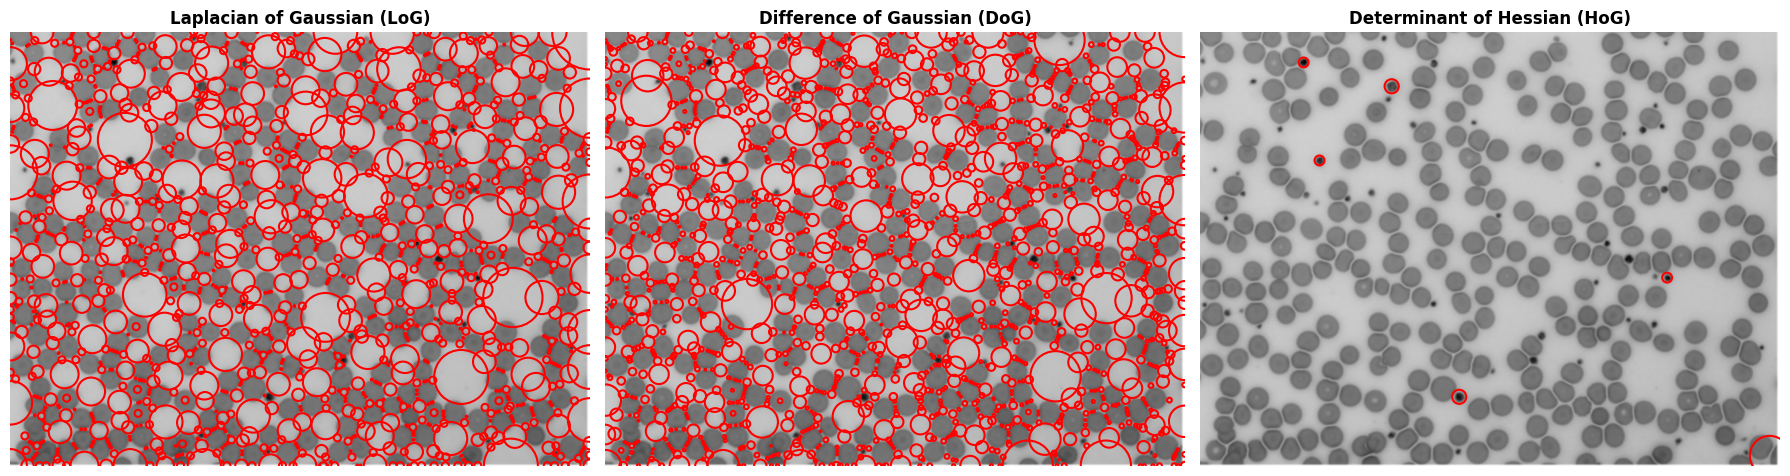

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import blob_log, blob_dog, blob_doh
from skimage import img_as_float
from skimage.filters import gaussian

# Load and preprocess the image
image_path = "/content/blob.jpg"  # Replace with the actual image path
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
image = img_as_float(image)  # Normalize image for better processing
image = gaussian(image, sigma=1)  # Apply slight Gaussian blur to reduce noise

# Apply LoG (Laplacian of Gaussian) with optimized parameters
blobs_log = blob_log(image, min_sigma=1, max_sigma=40, num_sigma=15, threshold=0.02, overlap=0.5)
blobs_log[:, 2] = blobs_log[:, 2] * np.sqrt(2)  # Compute radii

# Apply DoG (Difference of Gaussian) with optimized parameters
blobs_dog = blob_dog(image, min_sigma=1, max_sigma=40, sigma_ratio=1.6, threshold=0.02, overlap=0.5)
blobs_dog[:, 2] = blobs_dog[:, 2] * np.sqrt(2)

# Apply HoG (Determinant of Hessian)
blobs_doh = blob_doh(image, min_sigma=1, max_sigma=30, threshold=0.01)

# Function to visualize blobs
def plot_blobs(image, blobs_list, titles):
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    for ax, blobs, title in zip(axes, blobs_list, titles):
        ax.imshow(image, cmap='gray')
        for blob in blobs:
            y, x, r = blob
            c = plt.Circle((x, y), r, color='red', linewidth=1.5, fill=False)
            ax.add_patch(c)
        ax.set_title(title, fontsize=12, fontweight='bold')
        ax.axis("off")
    plt.tight_layout()
    plt.show()

# Plot results
plot_blobs(image, [blobs_log, blobs_dog, blobs_doh],
           ["Laplacian of Gaussian (LoG)", "Difference of Gaussian (DoG)", "Determinant of Hessian (HoG)"])

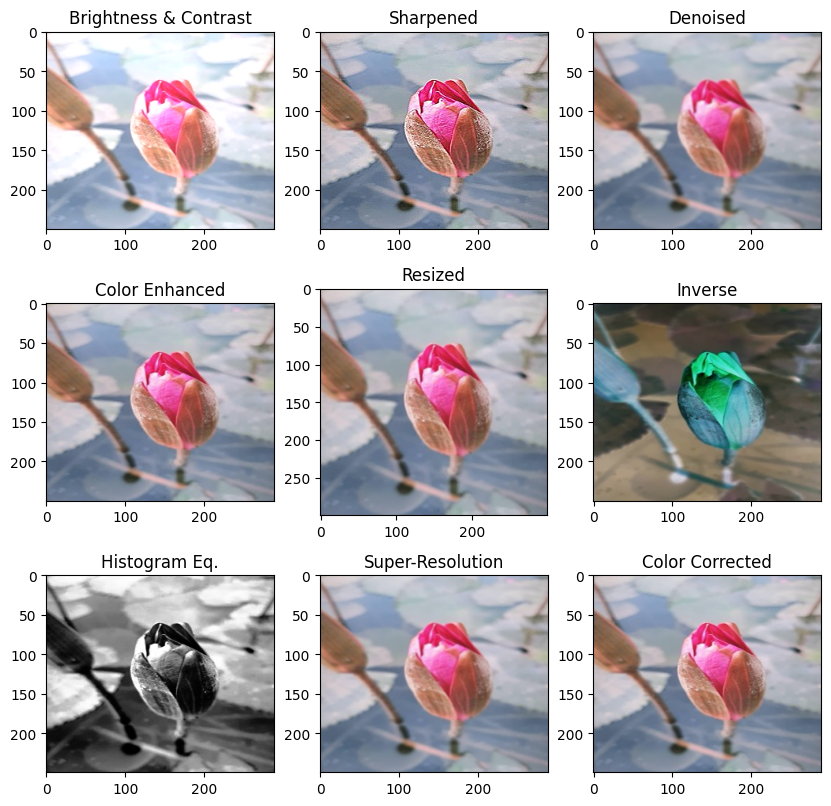

In [8]:
import cv2
import numpy as np
from skimage.exposure import equalize_hist

filepath = "/content/lotus.jpg"
# Load Image
def load_image(filepath):
    with open(filepath, 'rb') as f:
        img = cv2.imdecode(np.frombuffer(f.read(), np.uint8), cv2.IMREAD_COLOR)
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Image Enhancement Functions
def adjust_brightness_contrast(image, alpha=1.2, beta=20):
    return cv2.convertScaleAbs(image, alpha=alpha, beta=beta)

def sharpen_image(image):
    kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
    return cv2.filter2D(image, -1, kernel)

def remove_noise(image):
    return cv2.GaussianBlur(image, (5, 5), 0)

def enhance_color(image):
    hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    return cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)

def resize_image(image, width, height):
    return cv2.resize(image, (width, height))

def inverse_transform(image):
    return 255 - image

def histogram_equalization(image):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    return equalize_hist(gray)

def super_resolution(image):
    upscaled = cv2.pyrUp(image)
    return cv2.pyrDown(upscaled)

def color_correction(image):
    hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    lower = np.array([0, 0, 0])
    upper = np.array([255, 255, 255])
    mask = cv2.inRange(hsv, lower, upper)
    return cv2.bitwise_and(image, image, mask=mask)

# Example Usage
if __name__ == "__main__":
    img_path = "lotus.jpg"  # Change accordingly
    image = load_image(img_path)

    bright_contrast = adjust_brightness_contrast(image)
    sharpened = sharpen_image(image)
    noise_removed = remove_noise(image)
    color_enhanced = enhance_color(image)
    resized = resize_image(image, 300, 300)
    inverse = inverse_transform(image)
    hist_eq = histogram_equalization(image)
    super_res = super_resolution(image)
    color_corrected = color_correction(image)

    # Display Results
    import matplotlib.pyplot as plt
    plt.figure(figsize=(10, 10))
    plt.subplot(3, 3, 1), plt.imshow(bright_contrast), plt.title('Brightness & Contrast')
    plt.subplot(3, 3, 2), plt.imshow(sharpened), plt.title('Sharpened')
    plt.subplot(3, 3, 3), plt.imshow(noise_removed), plt.title('Denoised')
    plt.subplot(3, 3, 4), plt.imshow(color_enhanced), plt.title('Color Enhanced')
    plt.subplot(3, 3, 5), plt.imshow(resized), plt.title('Resized')
    plt.subplot(3, 3, 6), plt.imshow(inverse, cmap='gray'), plt.title('Inverse')
    plt.subplot(3, 3, 7), plt.imshow(hist_eq, cmap='gray'), plt.title('Histogram Eq.')
    plt.subplot(3, 3, 8), plt.imshow(super_res), plt.title('Super-Resolution')
    plt.subplot(3, 3, 9), plt.imshow(color_corrected), plt.title('Color Corrected')
    plt.show()



In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import time
from torchvision.models import vgg16, alexnet
from torch.utils.data import DataLoader

# Step 1: Set up the device for computation (CPU/GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Step 2: Load CIFAR-100 dataset
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

train_dataset = datasets.CIFAR100(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.CIFAR100(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=4)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=4)

# Step 3: Load Pretrained Models
def get_model(model_name):
    if model_name == "alexnet":
        model = alexnet(pretrained=True)
        model.classifier[6] = nn.Linear(4096, 100)
    elif model_name == "vgg16":
        model = vgg16(pretrained=True)
        model.classifier[6] = nn.Linear(4096, 100)
    model = model.to(device)
    return model

# Training Function
def train_model(model, train_loader, criterion, optimizer, epochs=5):
    model.train()
    for epoch in range(epochs):
        running_loss = 0.0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print(f"Epoch {epoch+1}, Loss: {running_loss/len(train_loader):.4f}")

# Evaluation Function
def evaluate_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    start_time = time.time()
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    end_time = time.time()
    accuracy = 100 * correct / total
    print(f"Accuracy: {accuracy:.2f}%, Inference Time: {end_time - start_time:.2f}s")
    return accuracy, end_time - start_time

# Train and Evaluate AlexNet
alexnet_model = get_model("alexnet")
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(alexnet_model.parameters(), lr=0.001)
train_model(alexnet_model, train_loader, criterion, optimizer, epochs=5)
alexnet_acc, alexnet_time = evaluate_model(alexnet_model, test_loader)

# Train and Evaluate VGG16
vgg16_model = get_model("vgg16")
optimizer = optim.Adam(vgg16_model.parameters(), lr=0.001)
train_model(vgg16_model, train_loader, criterion, optimizer, epochs=5)
vgg16_acc, vgg16_time = evaluate_model(vgg16_model, test_loader)

# Compare Results
print(f"AlexNet - Accuracy: {alexnet_acc:.2f}%, Time: {alexnet_time:.2f}s")
print(f"VGG16 - Accuracy: {vgg16_acc:.2f}%, Time: {vgg16_time:.2f}s")

Epoch 1, Loss: 4.6079
Epoch 2, Loss: 4.6066
Epoch 3, Loss: 4.6064
Epoch 4, Loss: 4.6062
Epoch 5, Loss: 4.6061
Accuracy: 1.00%, Inference Time: 18.07s
Epoch 1, Loss: 4.2898
Epoch 2, Loss: 3.7029
Epoch 3, Loss: 3.3686
Epoch 4, Loss: 3.1071
Epoch 5, Loss: 2.8620
Accuracy: 28.80%, Inference Time: 53.36s
AlexNet - Accuracy: 1.00%, Time: 18.07s
VGG16 - Accuracy: 28.80%, Time: 53.36s
